In [1]:
# Import Libraries
import numpy as np
import glob
import pandas as pd
from PIL import Image
import itertools
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

#Convolutional Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Gathering of Data

In [2]:
# path of datasets

covid = 'Dataset/train/Covid'
pneumoniaa = 'Dataset/train/Viral Pneumonia'
normall = 'Dataset/train/Normal'

path_train = "Dataset/train"
path_test = "Dataset/test"
path_valid = "Dataset/validation/"

# Preparing of Data

In [3]:
#  train, test and valid of data
train = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=path_train, target_size=(224,224), 
                                                                                                                            classes=['Covid','Viral Pneumonia', 'Normal'], 
                                                                                                                            batch_size=10)
test = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=path_test, target_size=(224,224), 
                                                                                                                           classes=['Covid','Viral Pneumonia', 'Normal'], 
                                                                                                                           batch_size=10, shuffle=False)
valid = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=path_valid, 
                                                                                                                            target_size=(224,224), 
                                                                                                                            classes=['Covid','Viral Pneumonia', 'Normal'], 
                                                                                                                            batch_size=10)
types = {
  0: "pneumonia",
  1: "normal",
  2: "covid"
}


Found 249 images belonging to 3 classes.
Found 65 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


# Visualization of Data

In [4]:
# plot sample images in the form of a 1 by 10 grid and resize img to 20x20
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35,10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        
    plt.tight_layout()

In [5]:
def Images_details_Print_data(data,path):
    print("===== Images in:", path)
    for k, v in data.items():
        print("%s:\t%s" %(k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive = True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100 # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100 # No image will be bigger than that
    data['max_height'] = 0
    
    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])
        
    Images_details_Print_data(data, path)


Trained data for COVID19 type disease:

===== Images in: Dataset/train/Covid
images_count:	112
min_width:	439
max_width:	4095
min_height:	391
max_height:	4095



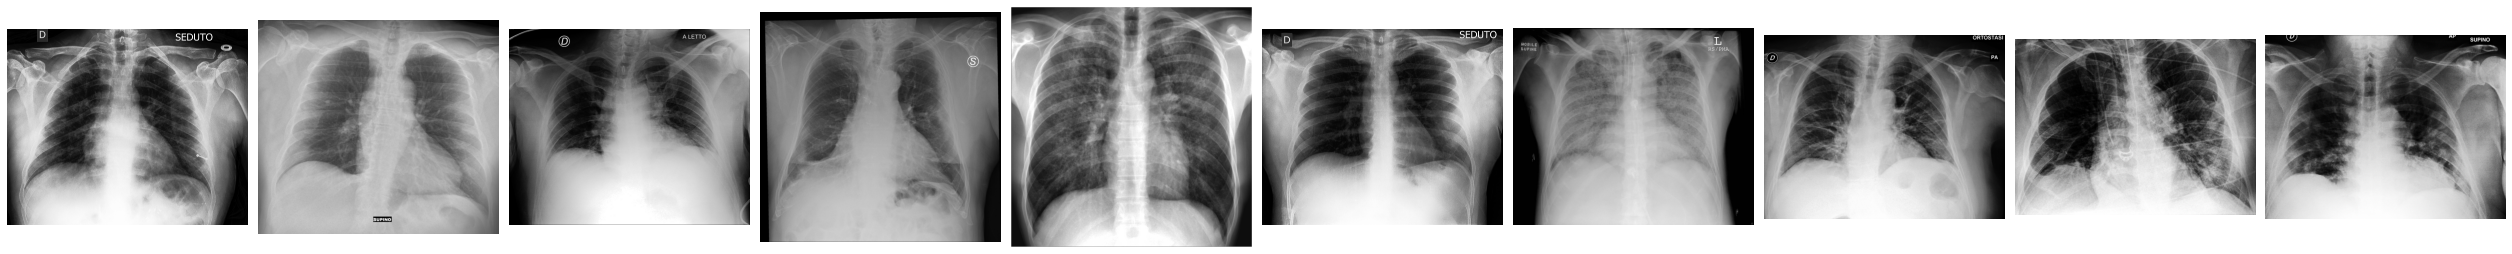

In [6]:
print("")
print("Trained data for COVID19 type disease:")
print("")
Images_details(covid)
print("")
plot_images(covid, 10)

# Choosing a Model

In [7]:
#choosing of model

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
    ])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 3)                 6

In [8]:
#compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training

In [9]:
batch_size = 10 

#Fit of model
history = model.fit(
    x = train, 
    steps_per_epoch=train.samples // batch_size, 
    epochs=20, 
    validation_data=test, 
    validation_steps=test.samples // batch_size,
    verbose=2)

Epoch 1/20
24/24 - 14s - loss: 37.9095 - accuracy: 0.6109 - val_loss: 9.2079 - val_accuracy: 0.7667 - 14s/epoch - 568ms/step
Epoch 2/20
24/24 - 12s - loss: 3.9586 - accuracy: 0.8996 - val_loss: 9.1145 - val_accuracy: 0.8167 - 12s/epoch - 516ms/step
Epoch 3/20
24/24 - 12s - loss: 2.2433 - accuracy: 0.9331 - val_loss: 10.6860 - val_accuracy: 0.7167 - 12s/epoch - 510ms/step
Epoch 4/20
24/24 - 12s - loss: 0.8250 - accuracy: 0.9582 - val_loss: 5.9478 - val_accuracy: 0.8500 - 12s/epoch - 520ms/step
Epoch 5/20
24/24 - 12s - loss: 0.5594 - accuracy: 0.9582 - val_loss: 5.9580 - val_accuracy: 0.8500 - 12s/epoch - 512ms/step
Epoch 6/20
24/24 - 12s - loss: 0.3715 - accuracy: 0.9874 - val_loss: 5.0965 - val_accuracy: 0.8500 - 12s/epoch - 504ms/step
Epoch 7/20
24/24 - 12s - loss: 0.1824 - accuracy: 0.9749 - val_loss: 5.7111 - val_accuracy: 0.8333 - 12s/epoch - 511ms/step
Epoch 8/20
24/24 - 12s - loss: 0.3109 - accuracy: 0.9749 - val_loss: 7.2376 - val_accuracy: 0.8000 - 12s/epoch - 509ms/step
Epoch 

# Visualization of Accuracy and Loss

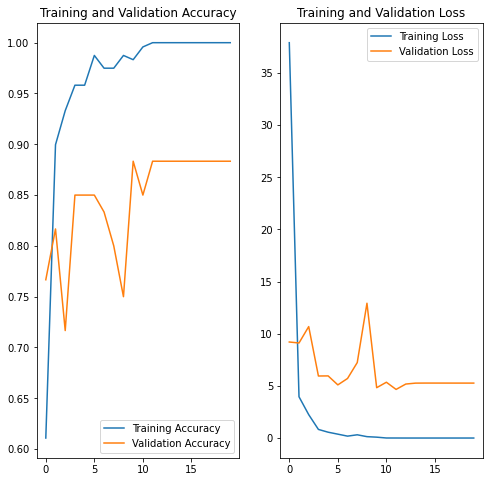

In [11]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(0, 20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

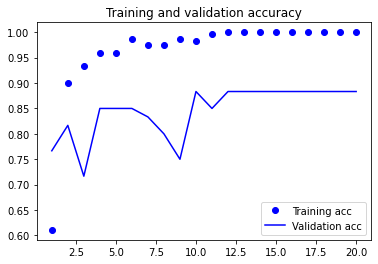

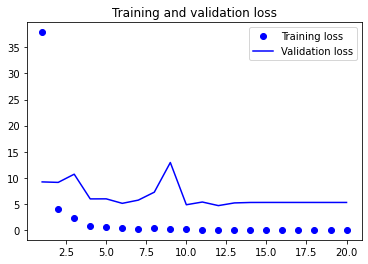

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
# predictions
pred = model.predict(x = test, verbose=0)

In [14]:
#Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Evaluation

Text(0.5, 6.800000000000011, 'Predicted label')

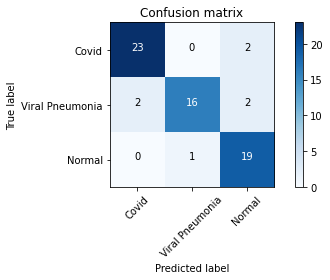

In [15]:
# Display confusion matrix
cm = confusion_matrix(y_true=test.classes, y_pred=np.argmax(pred, axis=-1))
plot_confusion_matrix(cm, classes = ['Covid', 'Viral Pneumonia', 'Normal'])

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Prediction

In [18]:
classes = ['C','V', 'N']

lbl = []
out = []

for i in os.listdir(path_valid):
    val_img = tf.keras.utils.load_img(path_valid+i,target_size=(224,224))
    val_img = tf.keras.utils.img_to_array(val_img)
    val_img = np.expand_dims(val_img,axis=0)
    predict_x=model.predict(val_img)
    output = classes[np.argmax(predict_x)]
    lbl.append(i)
    out.append(output)    
    print(
        i, " is  most likely belongs to", output)


1/1 [==============================] - 0s 31ms/step
pic1.jpeg  is  most likely belongs to C
1/1 [==============================] - 0s 26ms/step
pic10.jpeg  is  most likely belongs to C
1/1 [==============================] - 0s 27ms/step
pic2.jpeg  is  most likely belongs to C
1/1 [==============================] - 0s 28ms/step
pic3.jpeg  is  most likely belongs to C
1/1 [==============================] - 0s 26ms/step
pic4.jpeg  is  most likely belongs to V
1/1 [==============================] - 0s 26ms/step
pic5.jpeg  is  most likely belongs to V
1/1 [==============================] - 0s 27ms/step
pic6.jpeg  is  most likely belongs to C
1/1 [==============================] - 0s 26ms/step
pic7.jpg  is  most likely belongs to C
1/1 [==============================] - 0s 27ms/step
pic8.jpeg  is  most likely belongs to V
1/1 [==============================] - 0s 26ms/step
pic9.jpeg  is  most likely belongs to C
